### Image Morphology (Erosion and Dilation)
#### Theory
Morphological operations are a set of image processing techniques that process images based on their shapes. These operations are particularly useful in binary images and are widely used in tasks such as noise removal, image enhancement, and object detection. The fundamental operations in morphology are **erosion**, **dilation**, **opening**, and **closing**.

1. **Erosion**
Erosion is a morphological operation that removes pixels on object boundaries. It works by sliding a structuring element (kernel) over the image and eroding away the boundaries of regions of foreground pixels (white pixels in binary images). The result is a smaller object, and small noise can be removed.
2. **Dilation**
Dilation is the opposite of erosion. It adds pixels to the boundaries of objects in an image. It works by sliding the structuring element over the image and expanding the boundaries of regions of foreground pixels.
3. **Opening**
Opening is a combination of erosion followed by dilation. It is used to remove small objects or noise from the foreground while preserving the shape and size of larger objects.
4. **Closing**
Closing is a combination of dilation followed by erosion. It is used to fill small holes or gaps in the foreground objects while preserving their shape and size.
Applications of Morphological Operations
1. **Noise Removal**: Opening and closing are effective in removing noise from binary images.
2. **Object Detection**: Morphological operations can help in detecting specific shapes or structures in an image.
3. **Image Segmentation**: These operations are used in preprocessing steps for segmenting objects in an image.
4. **Boundary Extraction**: Erosion and dilation can be used to extract the boundaries of objects.

In this lab, we implemented these operations manually using Python and applied them to a binary image. The results were visualized to understand the effects of each operation.

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def manual_erode(image, kernel):
    h, w = image.shape
    kh, kw = kernel.shape
    pad_h, pad_w = kh // 2, kw // 2

    padded = np.pad(
        image, ((pad_h, pad_h), (pad_w, pad_w)), mode="constant", constant_values=0
    )
    result = np.zeros_like(image)
    for i in range(h):
        for j in range(w):
            region = padded[i : i + kh, j : j + kw]
            if np.all(region[kernel == 1] == 255):
                result[i, j] = 255
    return result

def manual_dilate(image, kernel):
    h, w = image.shape
    kh, kw = kernel.shape
    pad_h, pad_w = kh // 2, kw // 2

    padded = np.pad(
        image, ((pad_h, pad_h), (pad_w, pad_w)), mode="constant", constant_values=0
    )
    result = np.zeros_like(image)

    for i in range(h):
        for j in range(w):
            region = padded[i : i + kh, j : j + kw]
            if np.any(region[kernel == 1] == 255):
                result[i, j] = 255
    return result

def manual_open(image, kernel):
    return manual_dilate(manual_erode(image, kernel), kernel)

def manual_close(image, kernel):
    return manual_erode(manual_dilate(image, kernel), kernel)

In [4]:
image = cv2.imread("stdimgs/boat.png", cv2.IMREAD_GRAYSCALE)

_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

kernel = np.ones((3, 3), np.uint8)

erosion = manual_erode(binary_image, kernel)
dilation = manual_dilate(binary_image, kernel)
opening = manual_open(binary_image, kernel)
closing = manual_close(binary_image, kernel)

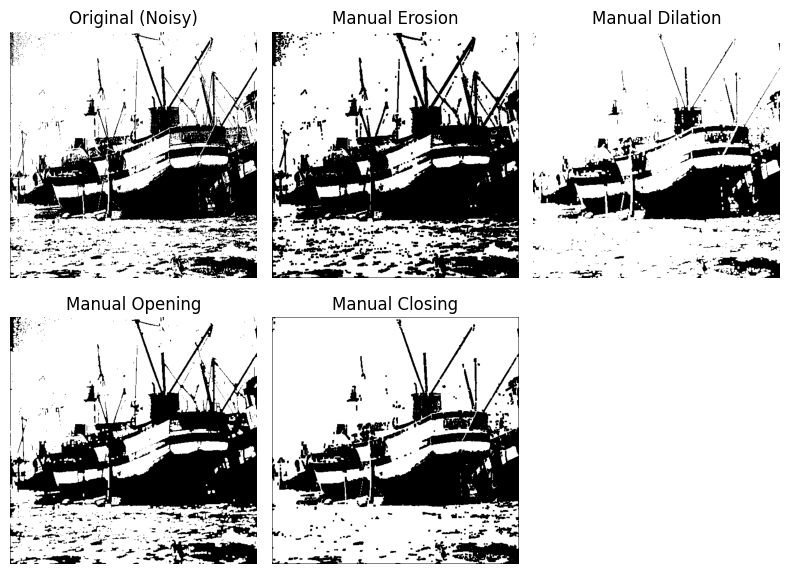

In [5]:
titles = ["Original (Noisy)", "Manual Erosion", "Manual Dilation", "Manual Opening", "Manual Closing"]
images = [binary_image, erosion, dilation, opening, closing]

plt.figure(figsize=(8, 6))
for i in range(len(images)):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], cmap="gray")
    plt.title(titles[i])
    plt.axis("off")
plt.tight_layout()